# 1. Coletando e preparando os dados

## Importando bibliotecas 

In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Importando os dados

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/adaoduque/Brasileirao_Dataset/master/campeonato-brasileiro-estatisticas-full.csv', index_col=0)
brasileirao = pd.read_csv('https://raw.githubusercontent.com/herozandn/estatistica_2/main/C%C3%B3digos/campeonato-brasileiro-full.csv', index_col=0)

## Tratando os dados

Verificar onde estão os dados faltantes para fatiar o dataframe

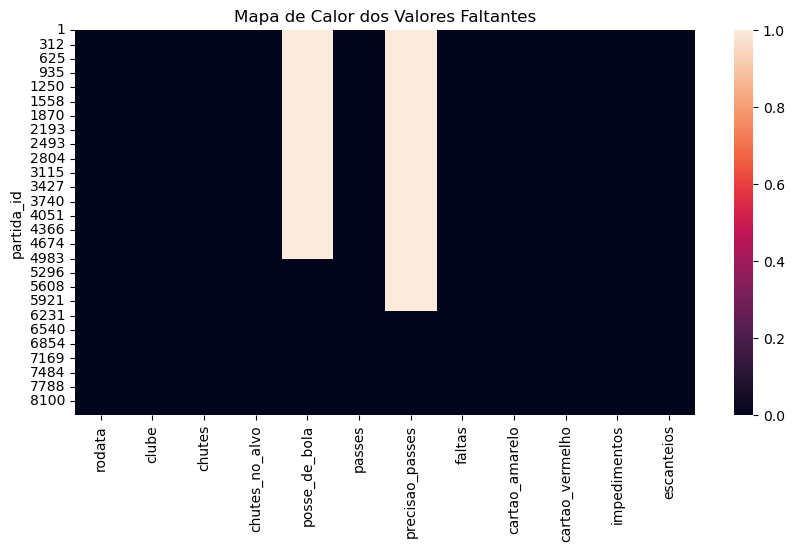

In [10]:
plt.figure(figsize=(10, 5))

sb.heatmap(df.isnull())
plt.title('Mapa de Calor dos Valores Faltantes')
plt.show()

Podemos notar acima que a partir de 2018 é a edição do campeonato brasileiro que não temos dados faltantes em nenhuma rodada

In [12]:
df_novo = df.loc[6126:8025]
df_novo.head() # df de 2018 até 2022

,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
partida_id,,,,,,,,,,,,
6126,1,Cruzeiro,12,2,40%,425,81%,20,3,0,0,7
6126,1,Gremio,6,2,60%,649,86%,15,1,1,3,4
6127,1,Vitoria,21,6,66%,545,88%,24,3,0,2,4
6127,1,Flamengo,10,5,34%,286,72%,10,2,1,2,5
6128,1,Santos,22,3,54%,532,90%,7,0,0,1,4


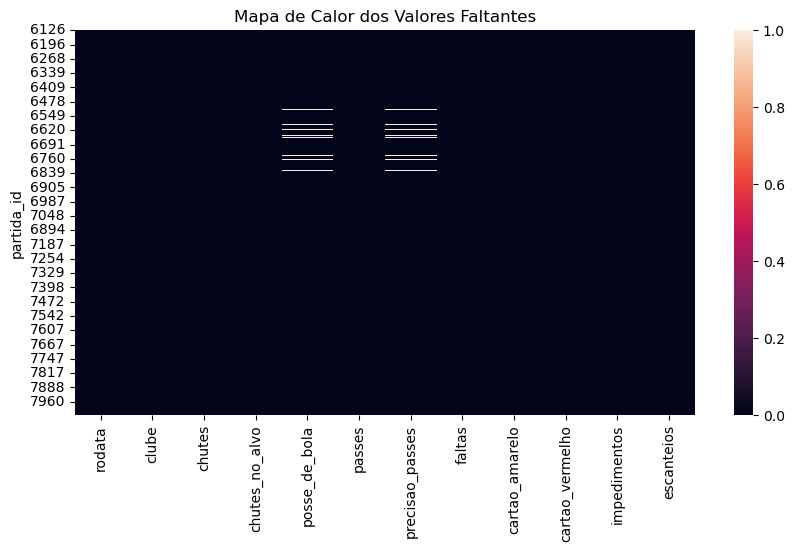

In [13]:
plt.figure(figsize=(10, 5))

sb.heatmap(df_novo.isnull())
plt.title('Mapa de Calor dos Valores Faltantes')
plt.show()

Aqui temos o campeonatos de 2018 até 2022. Existem alguns dados faltantes, mas pela quantidade pequena de suas ausências, 
escolhi preencher seus lugares vagos com a média das estatísticas das respectivas equipes

Como são alguns valores faltantes pontuais e não são muitos, preencherei as lacunas com a média das estatísticas agrupando por time

In [98]:
df_novo['posse_de_bola'] = df_novo['posse_de_bola'].fillna(0)


C:\Users\henri\AppData\Local\Temp\ipykernel_35728\4068402515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo['posse_de_bola'] = df_novo['posse_de_bola'].fillna(0)


In [94]:
#Visualiza os valores únicos para cada uma das três colunas
for column in df_novo[['posse_de_bola','precisao_passes']]:
    print(f"Valores únicos da coluna '{column}': {df_novo[column].unique()}")
    


Valores únicos da coluna 'posse_de_bola': ['40%' '60%' '66%' '34%' '54%' '46%' '38%' '62%' '67%' '33%' '45%' '55%'
 '35%' '65%' '70%' '30%' '48%' '52%' '49%' '51%' '61%' '39%' '31%' '69%'
 '64%' '36%' '44%' '56%' '28%' '72%' '42%' '58%' '59%' '41%' '53%' '47%'
 '22%' '78%' '37%' '63%' '57%' '43%' '75%' '25%' '32%' '68%' '73%' '27%'
 '29%' '71%' '74%' '26%' '76%' '24%' nan '50%' '21%' '79%' '77%' '23%'
 '80%' '20%']
Valores únicos da coluna 'precisao_passes': ['81%' '86%' '88%' '72%' '90%' '85%' '76%' '78%' '75%' '82%' '73%' '84%'
 '92%' '77%' '80%' '79%' '69%' '71%' '83%' '63%' '68%' '70%' '87%' '89%'
 '65%' '74%' '66%' '91%' '61%' '59%' '64%' '67%' '62%' nan '57%' '60%'
 '56%' '93%' '51%' '40%' '39%' '52%']


# 2. Análise Exploratória

### Mandantes vencem mais?

* Vamos analisar a distribuição da variável ‘winner’ para encontrarmos uma das estatísticas mais relevantes sobre as partidas de futebol, nomeadamente, a de que o time que joga em casa sempre tem uma chance maior de vitória. Essa métrica será utilizada posteriormente para avaliarmos se o modelo preditivo será ao menos capaz de prever quantidades similares para as diferentes categorias

In [32]:
#Preparando base de dados

brasileirao_novo = brasileirao.loc[6126:]
brasileirao_novo.head()

,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
ID,,,,,,,,,,,,,,,
6126,1,14/4/2018,16:00,Cruzeiro,Gremio,4-2-3-1,4-2-3-1,L. Venker de Menezes,Renato Gaúcho,Gremio,Mineirão,0,1,MG,RS
6127,1,14/4/2018,19:02,Vitoria,Flamengo,4-2-3-1,4-1-4-1,V. Carmo Mancini,M. Nogueira Barbieri,-,Barradão,2,2,BA,RJ
6128,1,14/4/2018,21:03,Santos,Ceara,4-3-3,4-1-4-1,J. Ribeiro Ventura,M. Oliveira Chamusca,Santos,Estádio Municipal Paulo Machado de Carvalho,2,0,SP,CE
6129,1,15/4/2018,11:00,America-MG,Sport,4-1-4-1,4-3-2-1,E. Alves Moreira,N. Baptista Júnior,America-MG,Estádio Raimundo Sampaio,3,0,MG,PE
6130,1,15/4/2018,16:01,Vasco,Atletico-MG,4-1-4-1,4-1-4-1,J. Mannarino,T. Mendes Larghi,Vasco,Estádio Vasco da Gama,2,1,RJ,MG


In [47]:
#Função que verifica o parecer do jogo
def verificar_vencedor(linha):
    if linha['mandante_Placar'] > linha['visitante_Placar']:
        return 0
    elif linha['mandante_Placar'] < linha['visitante_Placar']:
        return 1
    else:
        return 2

#Aplicando a função    
brasileirao_novo.loc[:, 'resultado'] = brasileirao_novo.apply(verificar_vencedor, axis=1)

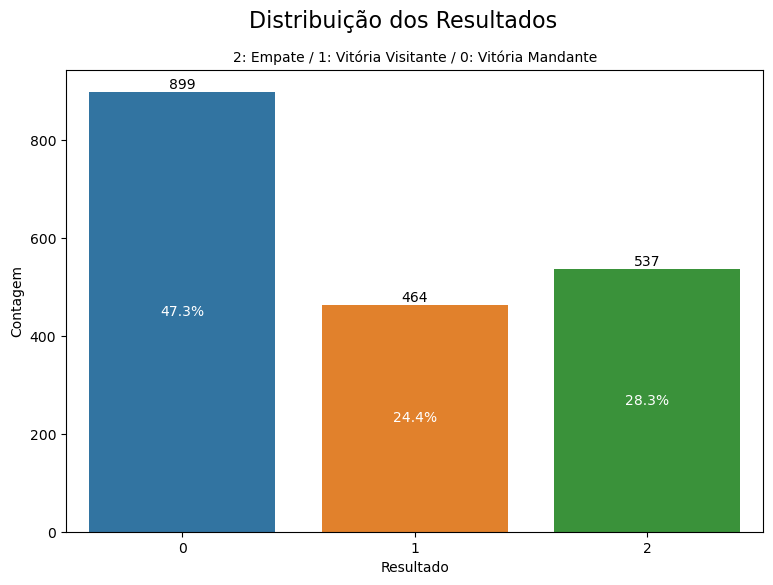

In [77]:
# Configurar o tamanho da figura
plt.figure(figsize=(9, 6))

# Criar o countplot
ax = sb.countplot(x='resultado', data=brasileirao_novo)

# Adicionar título e rótulos aos eixos
plt.suptitle('Distribuição dos Resultados', fontsize = 16)
plt.title('2: Empate / 1: Vitória Visitante / 0: Vitória Mandante', fontsize = 10)
plt.xlabel('Resultado')
plt.ylabel('Contagem')

total = len(brasileirao_novo)

for b in ax.patches:
    altura = b.get_height()
    porcentagem = 100 * altura / total
    
    ax.text(
        b.get_x() + b.get_width() / 2.,  # X position: center of the bar
        altura + 0.1,  # Y position: just above the bar
        f'{int(altura)}',  # Text to display (integer count)
        ha="center",  # Align horizontally center
        va="bottom"  # Align vertically bottom (text will be above the bar)
    )
    
    # Adicionar a porcentagem no centro da barra
    ax.text(
        b.get_x() + b.get_width() / 2.,  # X position: center of the bar
        altura / 2.,  # Y position: center of the bar
        f'{porcentagem:.1f}%',  # Text to display (percentage)
        ha="center",  # Align horizontally center
        va="center",  # Align vertically center
        color='white'  # Color of the text
    )
# Mostrar o gráfico
plt.show()